<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/SHAP_Abalone_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
import shap
shap.initjs()
import warnings
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv("/content/sample_data/abalone.csv")

In [24]:
print(len(data))
data.head()

4177


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Text(0.5, 0, 'whole weight')

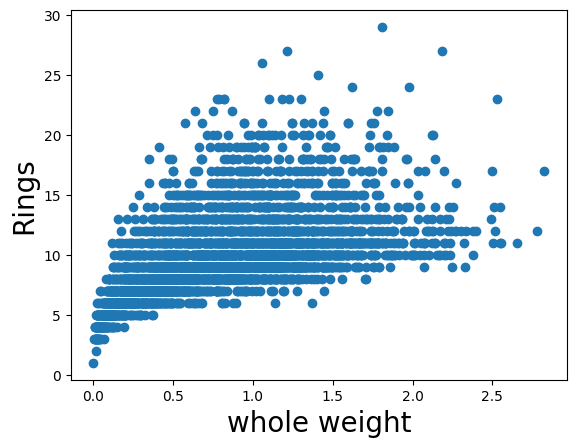

In [30]:
# plot 1 : whole weight

plt.scatter(data['Whole weight'], data['Rings'])
plt.ylabel('Rings', size=20)
plt.xlabel('whole weight', size=20)

In [31]:
print(data.columns)


Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [32]:
print(data[data['Sex'] == 'l'].shape)
print(data[data['Sex'] == 'm'].shape)
print(data[data['Sex'] == 'f'].shape)


(0, 9)
(0, 9)
(0, 9)


Text(0.5, 0, 'Sex')

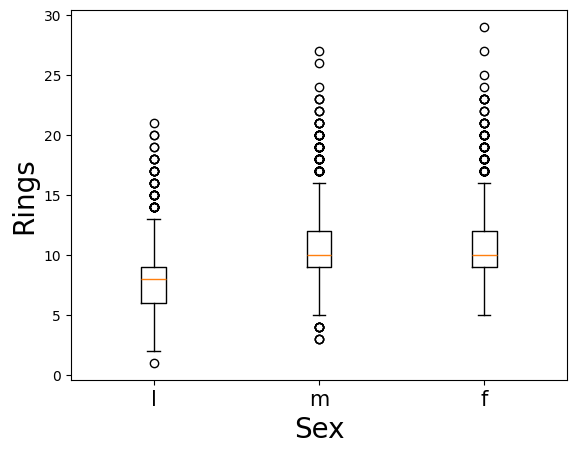

In [41]:
# plot 2: sex

plt.boxplot(data[data.Sex=='I']['Rings'], positions=[1]) # Changed data.sex to data.Sex
plt.boxplot(data[data.Sex=='M']['Rings'], positions=[2])
plt.boxplot(data[data.Sex=='F']['Rings'], positions=[3])

plt.xticks([1,2,3], ['l', 'm', 'f'], size= 15)
plt.ylabel('Rings', size=20)
plt.xlabel('Sex', size=20)

<Axes: >

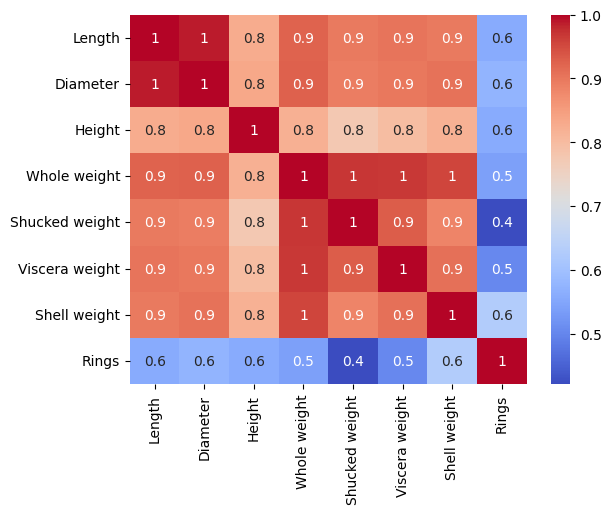

In [44]:
# Plot 3: Correlation heatmap
cont = ["Length", "Diameter", "Height",
       "Whole weight", "Shucked weight",
        "Viscera weight", "Shell weight",
        "Rings"]  # Changed column names to match DataFrame columns
corr_matrix = pd.DataFrame(data[cont], columns=cont).corr()

sns.heatmap(corr_matrix,
            cmap='coolwarm',
            annot=True,
            fmt='.1g')

# Feature Engineering

In [45]:
y = data['Rings']
X = data[["Sex", "Length", "Height",
          "Shucked weight", "Viscera weight", "Shell weight"]]

In [49]:
# Feature Engineering
y = data['Rings']
X = data[["Sex", "Length", "Height",
          "Shucked weight", "Viscera weight", "Shell weight"]]

# Create dummy variables *before* dropping the 'Sex' column
X['Sex.M'] = [1 if s == 'M' else 0 for s in X['Sex']]
X['Sex.F'] = [1 if s == 'F' else 0 for s in X['Sex']]
X['Sex.I'] = [1 if s == 'I' else 0 for s in X['Sex']]
X = X.drop('Sex', axis=1)  # Now it's safe to drop 'Sex'

X.head()

,Length,Height,Shucked weight,Viscera weight,Shell weight,Sex.M,Sex.F,Sex.I
0,0.455,0.095,0.2245,0.1010,0.150,1,0,0
1,0.350,0.090,0.0995,0.0485,0.070,1,0,0
2,0.530,0.135,0.2565,0.1415,0.210,0,1,0
3,0.440,0.125,0.2155,0.1140,0.155,1,0,0
4,0.330,0.080,0.0895,0.0395,0.055,0,0,1


# Modelling

In [50]:
# Train model
model = xgb.XGBRFRegressor(objective='reg:squarederror')
model.fit(X, y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

Text(0.5, 0, 'Actual')

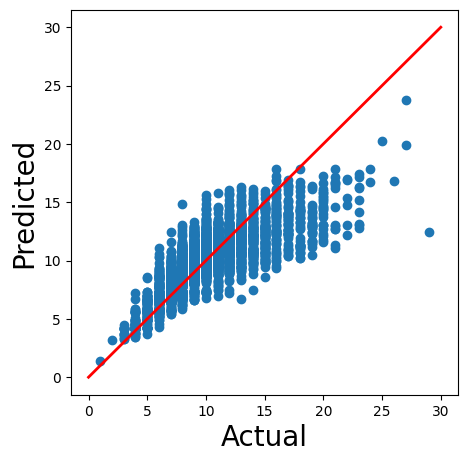

In [56]:
#Get predictions
y_pred = model.predict(X)

#Model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y, y_pred)
plt.plot([0,  30],
         [0,  30],
         color='r',
         linestyle='-',  # Changed linestyle to a valid value: '-'
         linewidth=2)

plt.ylabel('Predicted', size=20)
plt.xlabel('Actual', size=20)

# 1) Standard SHAP values

In [63]:
# Get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X)

# shap_values = explainer(X[0:100])

In [64]:
np.shape(shap_values.values)

(4177, 8)

# Waterfall Plot

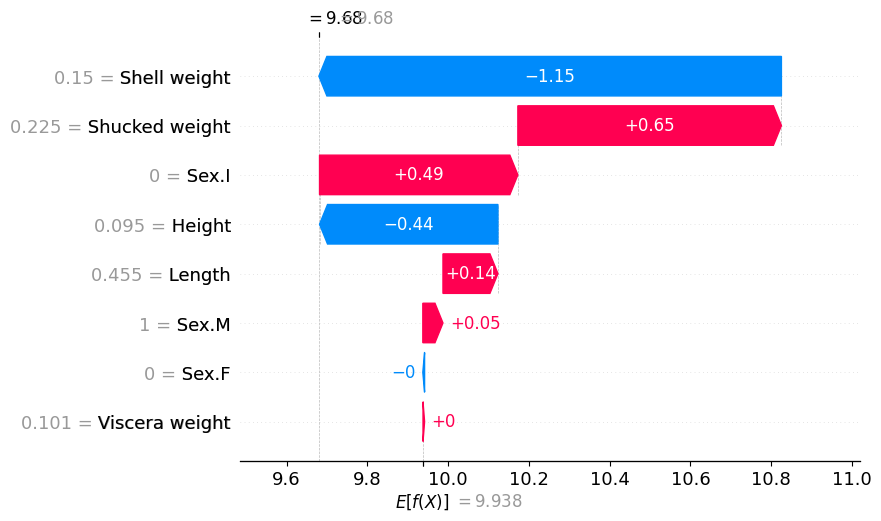

In [65]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

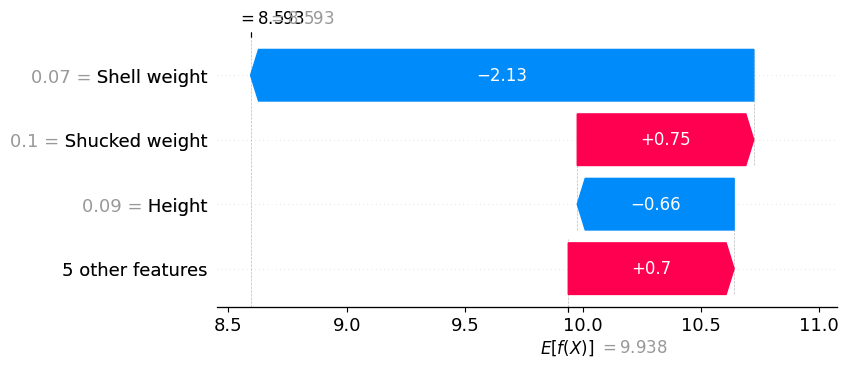

In [66]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[1], max_display=4)

# SHAP for binary target variables

In [67]:
# Binary target variable
y_bin = [1 if y_>10 else 0 for y_ in y]

In [68]:
# Train model
model_bin = xgb.XGBRFClassifier(objective='binary:logistic')
model_bin.fit(X, y_bin)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

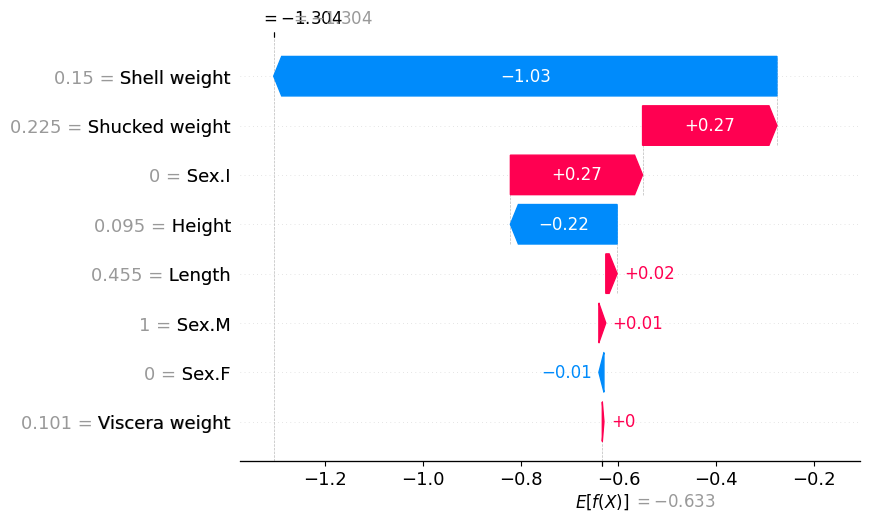

In [70]:
# Get shap values
explainer_bin = shap.Explainer(model_bin)
shap_values_bin = explainer_bin(X)

# waterfall plot for first observation
shap.plots.waterfall(shap_values_bin[0])

# 2) SHAP aggregations

## Note: from here on we only consider the continous target variable

# Force Plot

In [77]:
shap.initjs()
import warnings
warnings.filterwarnings('ignore')
# Generate the force plot with shap_values and base_value
shap.plots.force(shap_values[0])

# Stacked Force Plot

In [79]:
shap.initjs()
import warnings
warnings.filterwarnings('ignore')
shap.plots.force(shap_values[0:100])

# Absolute Mean SHAP

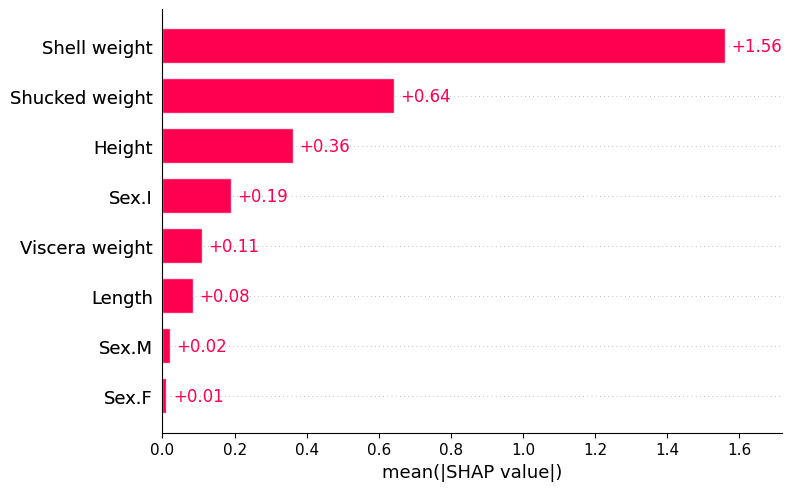

In [81]:
shap.plots.bar(shap_values)

# Beeswarm Plot

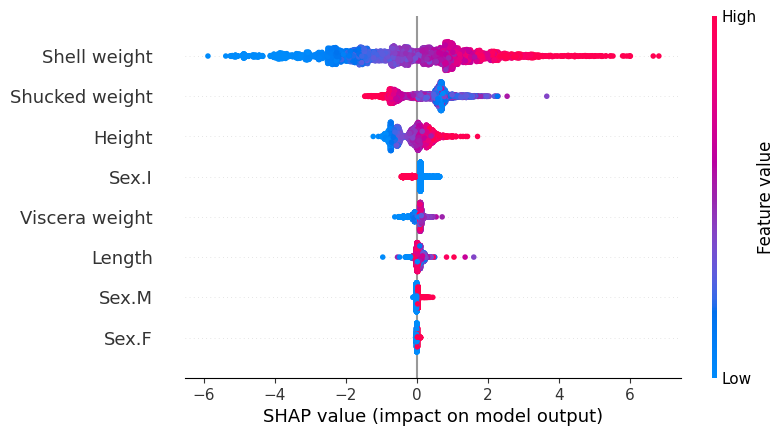

In [82]:
shap.plots.beeswarm(shap_values)

# Dependence Plots

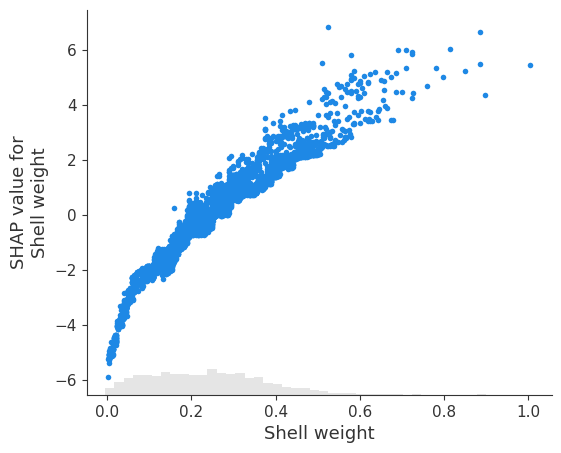

In [83]:
# Plt 1: Shell weight
shap.plots.scatter(shap_values[:, 'Shell weight'])

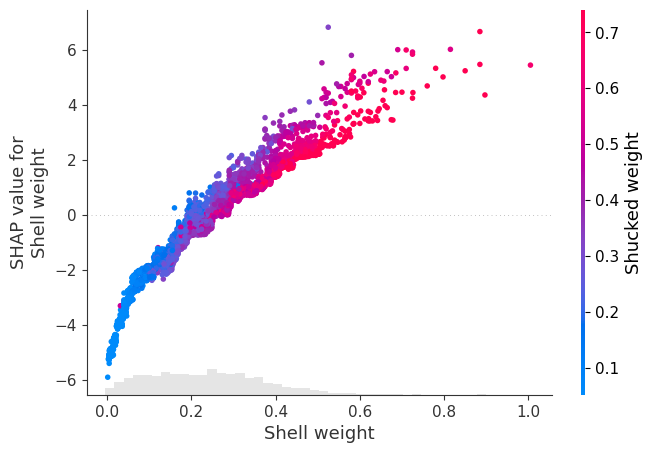

In [85]:
shap.plots.scatter(shap_values[:, 'Shell weight'],
                   color=shap_values[:,"Shucked weight"])

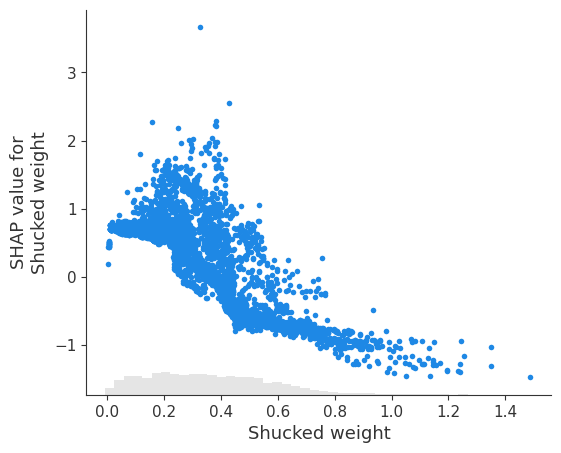

In [86]:
# Plot 2: Shucked weight
shap.plots.scatter(shap_values[:, 'Shucked weight'])

# 3) Custom Plot

In [ ]:
# Output SHAP object
shap_values